Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

Load the Dataset

In [10]:
df = pd.read_csv("birds_climate_data.csv")
print("Sample Data:\n", df.head())

Sample Data:
       species  sightings   avg_temp  humidity  location_lat  location_long  \
0      Bulbul         16  25.842305        83     15.219855      82.500122   
1     Sparrow         12  31.587988        46      8.407988      79.485752   
2  Kingfisher         11  19.967287        81     34.055415      81.344247   
3        Crow          9  30.699393        65     14.774112      83.540986   
4        Crow          9  31.585575        64     26.252710      85.244059   

   year  
0  2010  
1  2020  
2  2000  
3  2020  
4  2020  


Encode Target Variable

In [11]:
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

Define Features and Target

In [12]:
X = df[['avg_temp', 'humidity', 'location_lat', 'location_long', 'year']]
y = df['species_encoded']

Scale Features

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Logistic Regression Model

In [20]:
model = LogisticRegression(max_iter=5000, solver='saga')  
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='saga')

Predict & Evaluate

In [21]:
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

      Bulbul       0.20      0.32      0.24        19
        Crow       0.14      0.20      0.16        15
  Kingfisher       0.19      0.29      0.23        21
      Parrot       0.00      0.00      0.00        21
     Sparrow       0.14      0.08      0.11        24

    accuracy                           0.17       100
   macro avg       0.13      0.18      0.15       100
weighted avg       0.13      0.17      0.14       100



Visualize Climate Trend Over Years

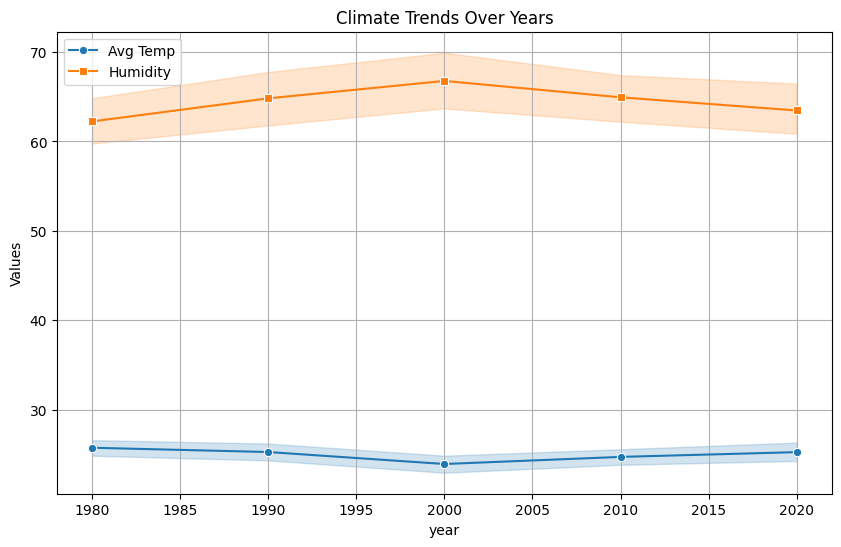

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='avg_temp', label='Avg Temp', marker='o')
sns.lineplot(data=df, x='year', y='humidity', label='Humidity', marker='s')
plt.title('Climate Trends Over Years')
plt.ylabel('Values')
plt.grid(True)
plt.show()

Map Visualization with folium

In [24]:
!pip install folium


   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



In [25]:
import folium
from folium.plugins import MarkerCluster

# Initialize map centered around India
m = folium.Map(location=[22.0, 78.0], zoom_start=4)

# Add markers using a marker cluster
marker_cluster = MarkerCluster().add_to(m)
for i, row in df.iterrows():
    popup_text = f"{row['species']} - {row['year']} ({row['sightings']} sightings)"
    folium.Marker(location=[row['location_lat'], row['location_long']], popup=popup_text).add_to(marker_cluster)

# Save map to HTML
m.save("bird_sightings_map.html")
print("Map saved as bird_sightings_map.html")

Map saved as bird_sightings_map.html
